In [1]:
%pylab inline
import pandas as pd
from sklearn import preprocessing, decomposition

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("decathlon.txt",sep="\t")

In [3]:
df.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [4]:
df.drop(labels=["Competition", "Rank"],axis=1, inplace=True)

In [5]:
df.reset_index(inplace=True)

In [6]:
df.rename(columns={"index":"Name"}, inplace=True)

In [7]:
df.shape

(41, 12)

In [8]:
df.Name = df.Name.apply(str.upper)

In [9]:
df_2 = df[df.duplicated(subset="Name",keep=False)]

In [10]:
df_2.shape

(18, 12)

In [11]:
df_2

,Name,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Points
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,8217
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,8122
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,8099
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,8067
5,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,8030
6,ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,8004
9,HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,7733
10,BARRAS,11.33,6.97,14.09,1.95,49.48,14.48,42.10,4.72,55.40,282.00,7708
11,NOOL,11.33,7.27,12.68,1.98,49.20,15.29,37.92,4.62,57.44,266.60,7651
13,SEBRLE,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,8893


In [12]:
df_3 = df_2.groupby("Name").mean()

In [13]:
df_3

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Points
Name,,,,,,,,,,,
BARRAS,11.235,6.980,14.500,1.945,49.445,14.425,43.465,4.66,59.975,274.545,7887.5
BERNARD,10.855,7.355,14.525,2.020,49.030,14.580,42.810,4.86,59.020,278.205,8146.0
CLAY,10.600,7.680,14.745,1.960,49.280,14.090,50.415,4.91,64.930,291.750,8471.0
HERNU,11.170,7.375,14.530,1.945,49.915,14.655,44.855,4.81,57.475,274.725,7985.0
KARPOV,10.760,7.555,15.350,2.065,47.590,14.030,50.300,4.76,52.925,289.155,8412.0
NOOL,11.065,7.400,13.470,1.930,49.005,15.045,39.985,5.01,59.385,271.465,7943.0
SEBRLE,10.945,7.710,15.595,2.095,49.085,14.370,46.235,5.01,66.855,285.855,8555.0
WARNERS,10.865,7.670,14.395,1.975,48.325,14.120,42.415,4.91,53.580,278.075,8186.5
ZSIVOCZKY,11.020,7.220,14.395,2.065,49.010,14.560,45.645,4.56,59.410,268.770,8145.5


In [14]:
df_4 = df_3.drop("Points", axis=1)

In [15]:
stdScaler = preprocessing.StandardScaler().fit(df_4)

In [16]:
df_5 = stdScaler.transform(df_4)

In [32]:
df_6 = pd.DataFrame(df_5)

In [33]:
df_6.describe()

,0,1,2,3,4,5,6,7,8,9
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
mean,-3.114792e-15,-4.366877e-15,3.330669e-16,-1.258253e-15,6.298974e-15,1.949058e-15,1.233581e-17,-2.072416e-15,7.347518e-16,-8.141636e-16
std,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00
min,-1.828435e+00,-2.006391e+00,-1.992829e+00,-1.191759e+00,-2.187906e+00,-1.308347e+00,-1.555920e+00,-1.895867e+00,-1.480567e+00,-1.377128e+00
25%,-4.813215e-01,-3.647983e-01,-3.782011e-01,-9.363822e-01,6.364816e-02,-1.014377e+00,-7.007696e-01,-5.029851e-01,-4.211712e-01,-6.125473e-01
50%,-5.869774e-03,-1.678072e-01,-1.512804e-01,-4.256283e-01,1.034283e-01,-1.814628e-02,-8.173123e-02,1.934558e-01,2.354213e-02,-1.451931e-01
75%,6.280658e-01,1.014139e+00,2.327392e-01,1.106633e+00,5.012293e-01,4.881349e-01,3.360062e-01,5.416763e-01,1.609143e-01,8.848396e-01
max,1.526141e+00,1.189243e+00,1.716451e+00,1.617387e+00,1.511644e+00,2.006979e+00,1.601327e+00,1.238117e+00,1.762814e+00,1.665308e+00


In [17]:
pca = decomposition.PCA(n_components=2).fit(df_5)

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.4776958 , 0.66798129])

In [19]:
df_proj = pca.transform(df_5)

In [20]:
df_proj

array([[-2.3251953 ,  1.13428121],
       [-0.41855397, -0.17689214],
       [ 2.66423884, -1.63099057],
       [-1.81979135, -0.2387683 ],
       [ 3.38840322,  2.05543107],
       [-2.9983262 , -1.69114427],
       [ 2.18435698, -1.49834654],
       [ 0.53723055,  0.11027343],
       [-1.21236277,  1.93615611]])

Text(0, 0.5, 'PC2')

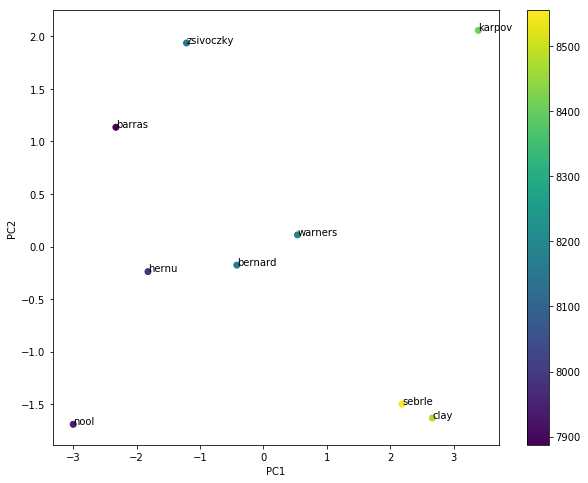

In [21]:
figsize(10,8)
plt.scatter(df_proj[:,0],df_proj[:,1],c=df_3.Points)
plt.colorbar()
for i, (x,y) in enumerate(df_proj):
    plt.text(x, y, str.lower(df_3.index[i]), fontsize='10')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [22]:
pcc = pca.components_

In [24]:
pcc

array([[-0.37917471,  0.34136009,  0.36617476,  0.26074393, -0.25715735,
        -0.381466  ,  0.37104771,  0.10025209,  0.0449991 ,  0.41979813],
       [ 0.12555688, -0.35371355,  0.12457859,  0.24374235, -0.30333838,
        -0.20716777,  0.1473667 , -0.63267506, -0.44751943, -0.16428956]])

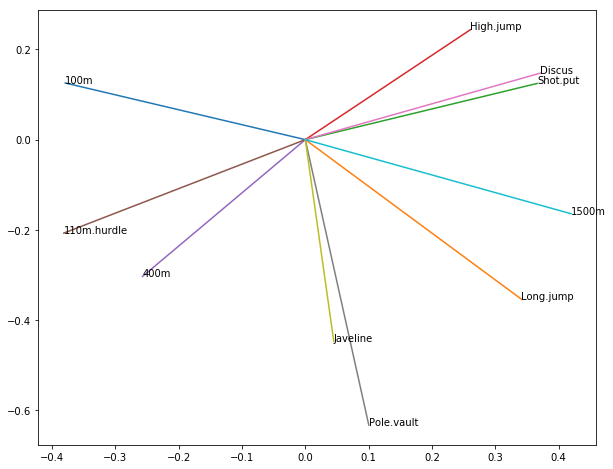

In [27]:
for i, (x,y) in enumerate(pcc.T):
    plt.plot([0,x],[0,y])
    plt.text(x, y, df_4.columns[i])

(-0.7, 0.7)

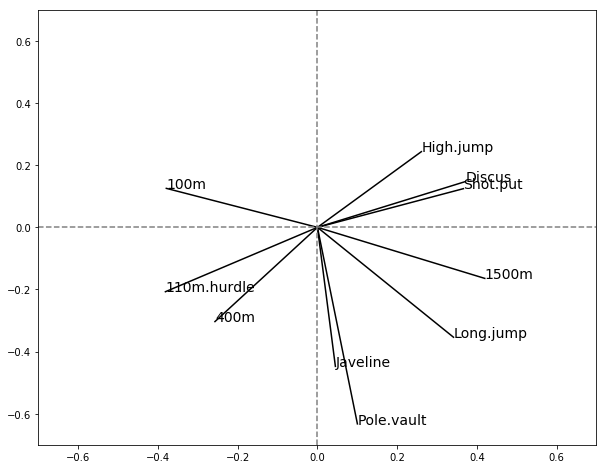

In [28]:

for i, (x, y) in enumerate(zip(pcc[0, :], pcc[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df_4.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])